In [92]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from statsmodels.graphics.tsaplots import plot_pacf

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import fcluster
%matplotlib inline

In [93]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv (open/high/low/close/volume) data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [94]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [95]:
def clusters(timeSeries, pair):
    z_euclidean = hac.linkage(timeSeries, method='weighted', metric='euclidean')
    z_minkowski = hac.linkage(timeSeries, method='weighted', metric='minkowski')
    z_cityblock = hac.linkage(timeSeries, method='weighted', metric='cityblock')
    z_cosine = hac.linkage(timeSeries, method='weighted', metric='cosine')
    #z_correlation = hac.linkage(timeSeries, method='weighted', metric='correlation')
    
    p = 12
    max_d = 50  
    print("Euclidean")
    fancy_dendrogram(
        z_euclidean,
        truncate_mode='lastp',
        p=p,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,  # useful in small plots so annotations don't overlap
        max_d=max_d,
    )
    plt.show()

    print("Minkowski")
    fancy_dendrogram(
        z_minkowski,
        truncate_mode='lastp',
        p=p,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,  # useful in small plots so annotations don't overlap
        max_d=max_d,
    )
    plt.show()

    print("Cityblock")
    fancy_dendrogram(
        z_cityblock,
        truncate_mode='lastp',
        p=p,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,  # useful in small plots so annotations don't overlap
        max_d=max_d,
    )
    plt.show()

    print("Cosine")
    fancy_dendrogram(
        z_cosine,
        truncate_mode='lastp',
        p=p,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,  # useful in small plots so annotations don't overlap
        max_d=max_d,
    )
    plt.show()

#     print("Correlation")
#     fancy_dendrogram(
#         z_correlation,
#         truncate_mode='lastp',
#         p=p,
#         leaf_rotation=90.,
#         leaf_font_size=12.,
#         show_contracted=True,
#         annotate_above=10,  # useful in small plots so annotations don't overlap
#     )
#     plt.show()

    print("Cophenetic Correlation Coefficients")
    print("")
    c, coph_dists = cophenet(z_euclidean, pdist(timeSeries))
    print("Euclidean Cophenetic Correlation Coefficient: " + str(c))
    c, coph_dists = cophenet(z_minkowski, pdist(timeSeries))
    print("Minkowski Cophenetic Correlation Coefficient: " + str(c))
    c, coph_dists = cophenet(z_cityblock, pdist(timeSeries))
    print("Cityblock Cophenetic Correlation Coefficient: " + str(c))
    c, coph_dists = cophenet(z_cosine, pdist(timeSeries))
    print("Cosine Cophenetic Correlation Coefficient: " + str(c))
    # c, coph_dists = cophenet(z_correlation, pdist(timeSeries))
    # print("Correlation Cophenetic Correlation Coefficient: " + str(c))
    
    print("Euclidean Clusters")
    clusters = fcluster(z_euclidean, max_d, criterion='distance')
    plt.figure(figsize=(10, 8))
    ar = np.arange(len(timeSeries))
    plt.scatter(timeSeries[pair], np.zeros_like(ar), c=clusters, cmap='prism')  # plot points with cluster dependent colors
    plt.show()

In [96]:
def plot_partial_lag(timeSeries, lag):
    plot_pacf(timeSeries, lags=lag)
    plt.show()

USDT_BTC
Euclidean


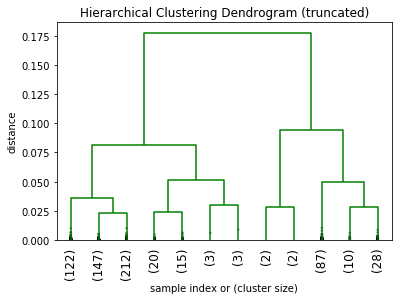

Minkowski


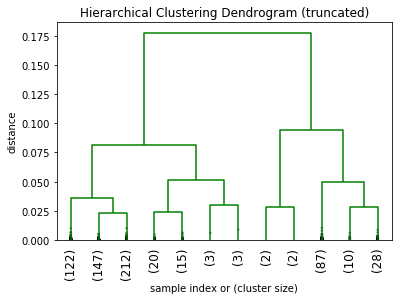

Cityblock


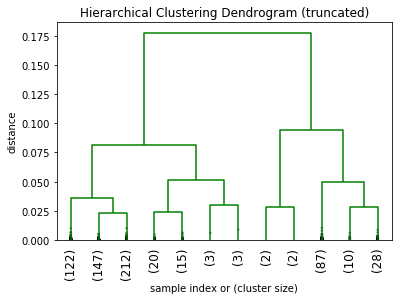

Cosine


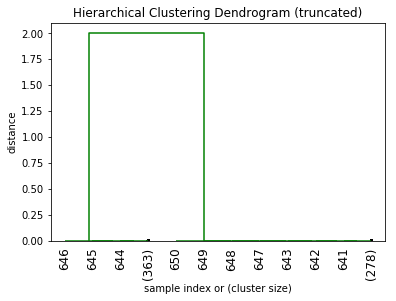

Cophenetic Correlation Coefficients

Euclidean Cophenetic Correlation Coefficient: 0.6481636640776605
Minkowski Cophenetic Correlation Coefficient: 0.6481636640776605
Cityblock Cophenetic Correlation Coefficient: 0.6481636640776605
Cosine Cophenetic Correlation Coefficient: 0.43396578576367917
Euclidean Clusters


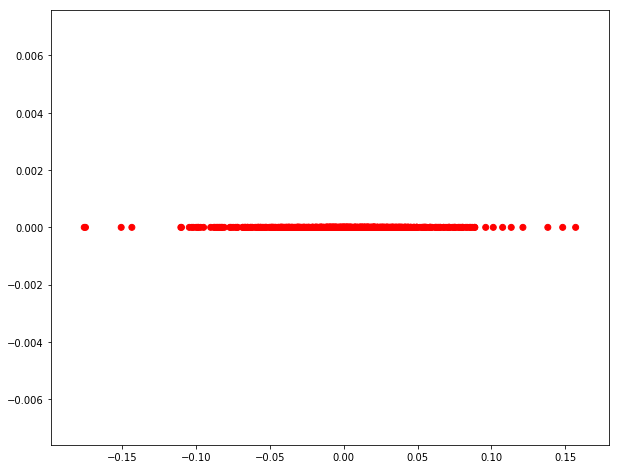

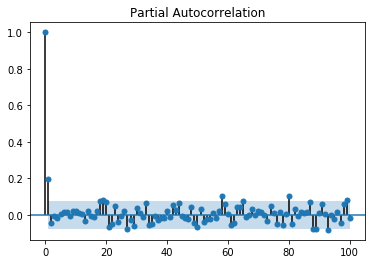

USDT_ETH
Euclidean


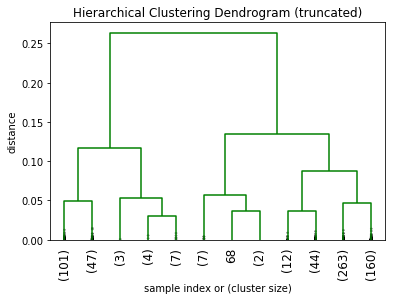

Minkowski


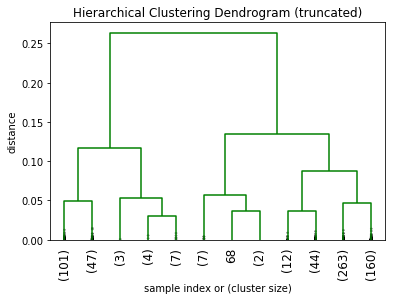

Cityblock


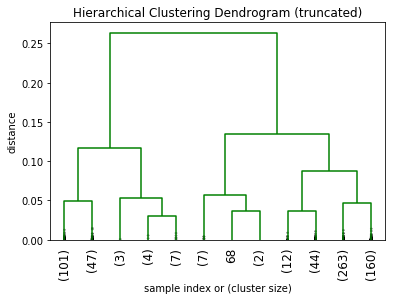

Cosine


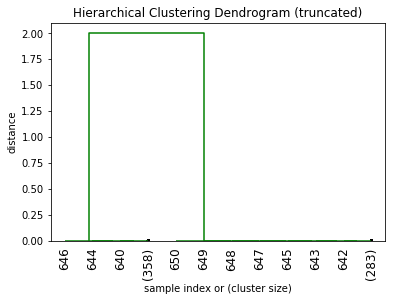

Cophenetic Correlation Coefficients

Euclidean Cophenetic Correlation Coefficient: 0.5772886841638065
Minkowski Cophenetic Correlation Coefficient: 0.5772886841638065
Cityblock Cophenetic Correlation Coefficient: 0.5772886841638065
Cosine Cophenetic Correlation Coefficient: 0.3857096305144723
Euclidean Clusters


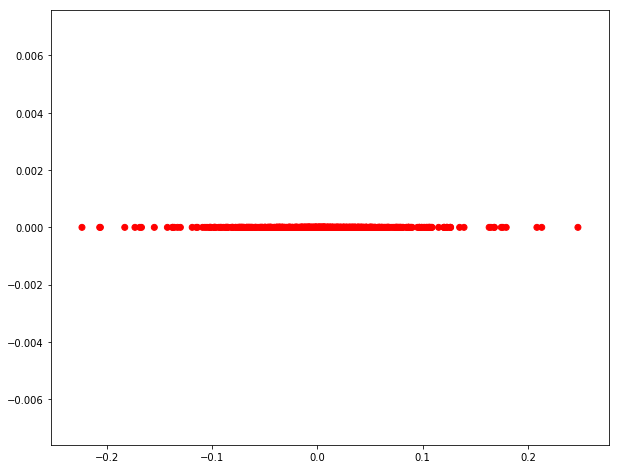

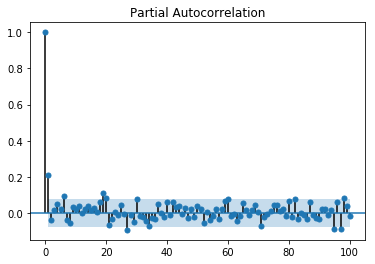

USDT_LTC
Euclidean


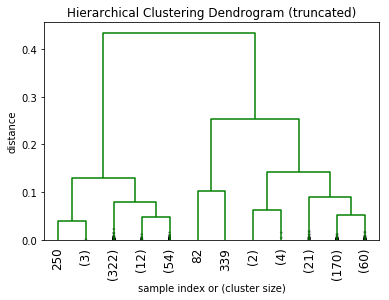

Minkowski


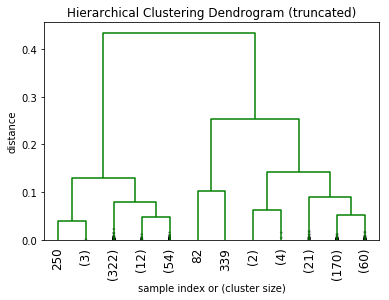

Cityblock


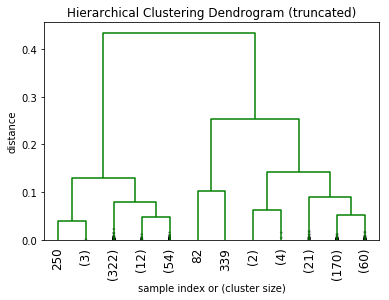

Cosine


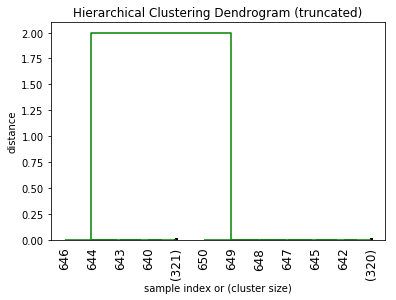

Cophenetic Correlation Coefficients

Euclidean Cophenetic Correlation Coefficient: 0.42510303231497637
Minkowski Cophenetic Correlation Coefficient: 0.42510303231497637
Cityblock Cophenetic Correlation Coefficient: 0.42510303231497637
Cosine Cophenetic Correlation Coefficient: 0.3317476883745398
Euclidean Clusters


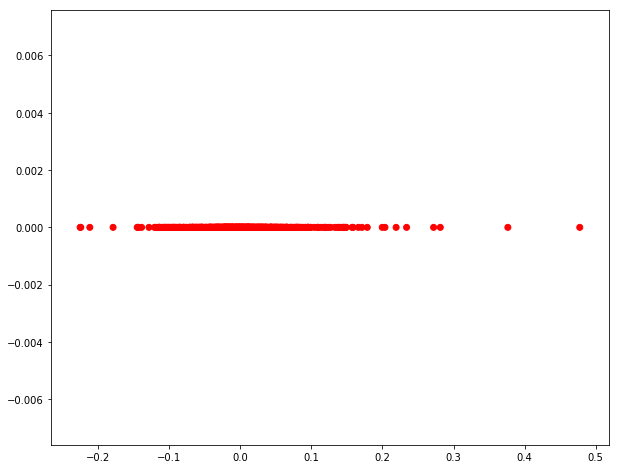

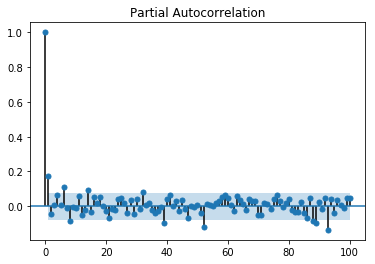

USDT_DASH
Euclidean


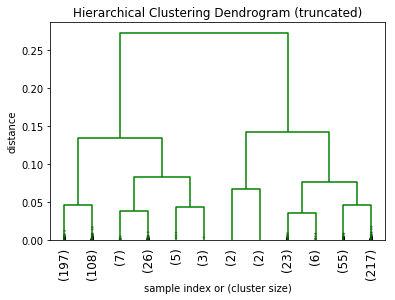

Minkowski


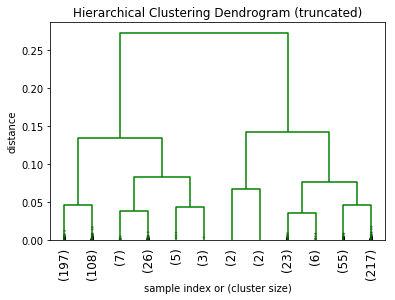

Cityblock


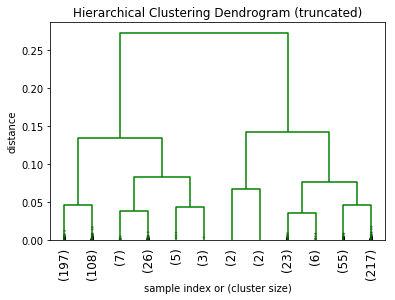

Cosine


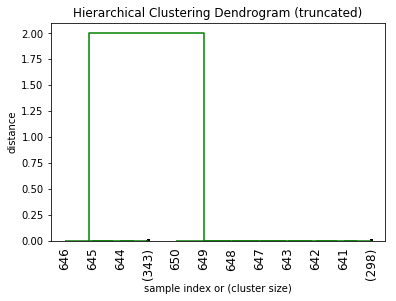

Cophenetic Correlation Coefficients

Euclidean Cophenetic Correlation Coefficient: 0.5105346542616636
Minkowski Cophenetic Correlation Coefficient: 0.5105346542616636
Cityblock Cophenetic Correlation Coefficient: 0.5105346542616636
Cosine Cophenetic Correlation Coefficient: 0.42195595040469674
Euclidean Clusters


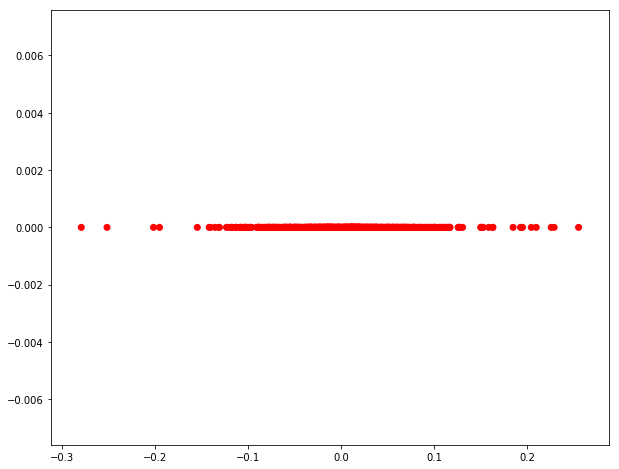

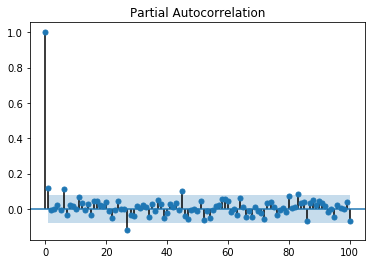

BTC_ETH
Euclidean


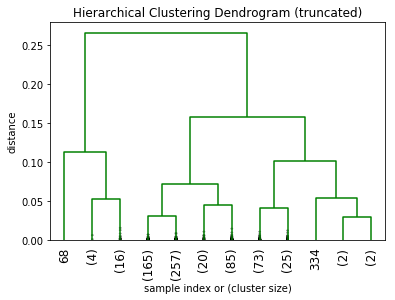

Minkowski


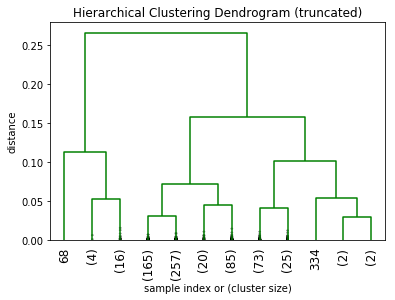

Cityblock


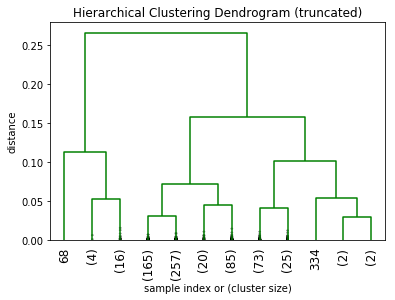

Cosine


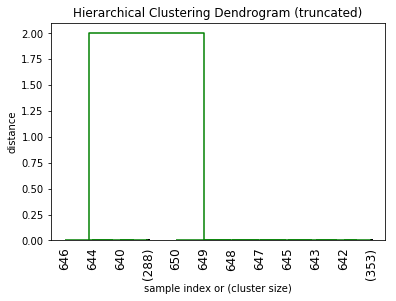

Cophenetic Correlation Coefficients

Euclidean Cophenetic Correlation Coefficient: 0.7459471804552865
Minkowski Cophenetic Correlation Coefficient: 0.7459471804552865
Cityblock Cophenetic Correlation Coefficient: 0.7459471804552865
Cosine Cophenetic Correlation Coefficient: 0.3436354903546618
Euclidean Clusters


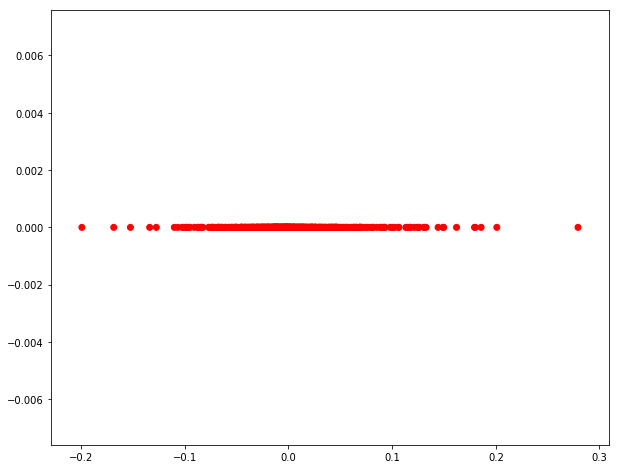

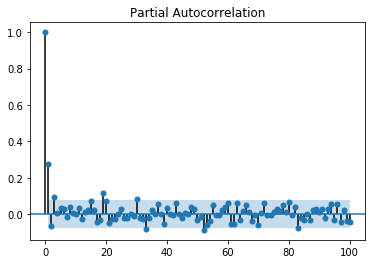

BTC_LTC
Euclidean


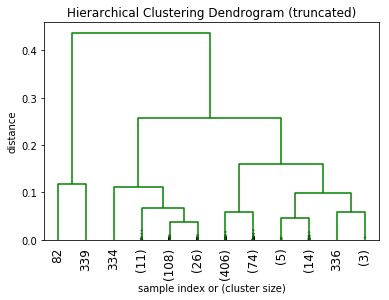

Minkowski


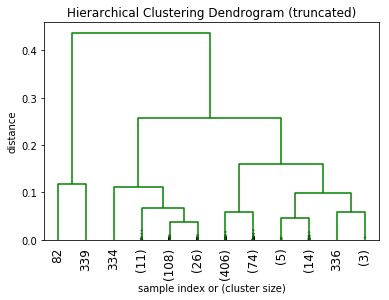

Cityblock


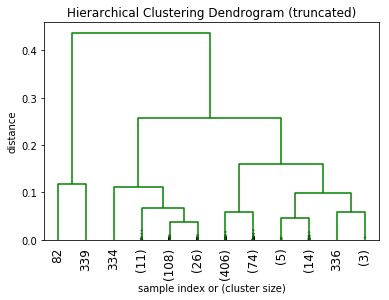

Cosine


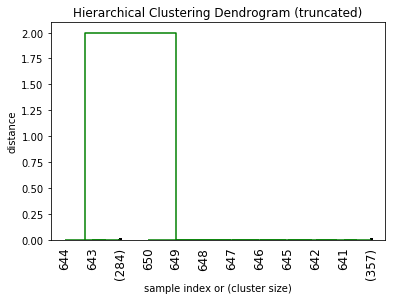

Cophenetic Correlation Coefficients

Euclidean Cophenetic Correlation Coefficient: 0.5146955218401945
Minkowski Cophenetic Correlation Coefficient: 0.5146955218401945
Cityblock Cophenetic Correlation Coefficient: 0.5146955218401945
Cosine Cophenetic Correlation Coefficient: 0.2731523251389581
Euclidean Clusters


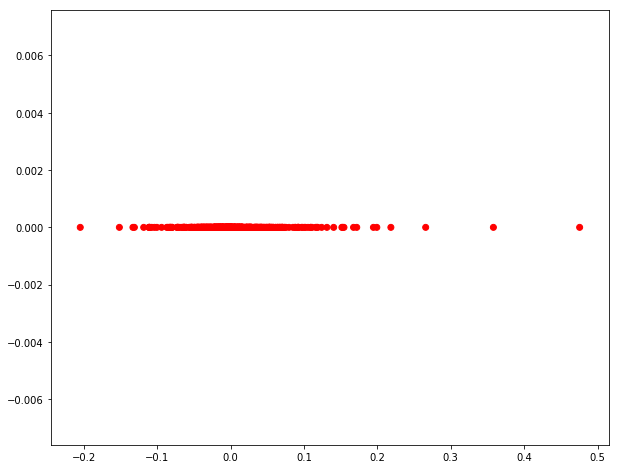

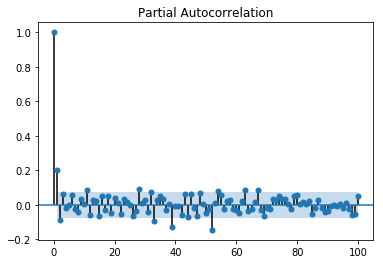

BTC_DASH
Euclidean


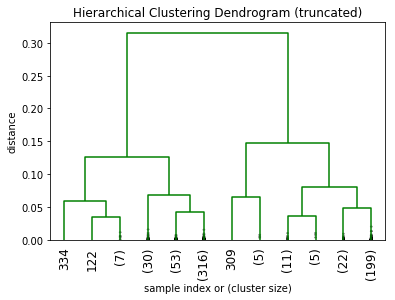

Minkowski


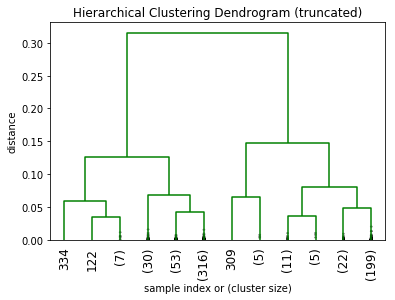

Cityblock


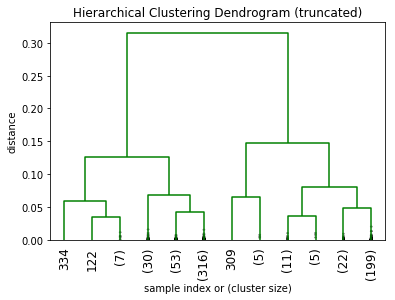

Cosine


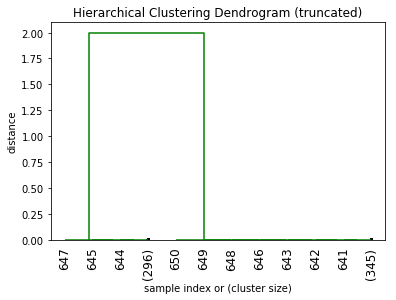

Cophenetic Correlation Coefficients

Euclidean Cophenetic Correlation Coefficient: 0.4583709734448423
Minkowski Cophenetic Correlation Coefficient: 0.4583709734448423
Cityblock Cophenetic Correlation Coefficient: 0.4583709734448423
Cosine Cophenetic Correlation Coefficient: 0.3469686118706593
Euclidean Clusters


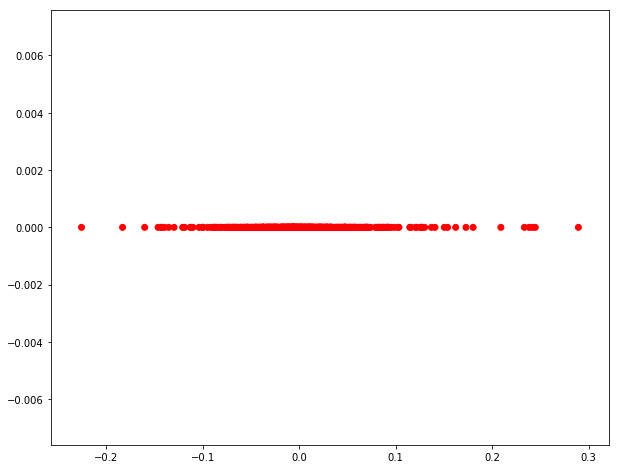

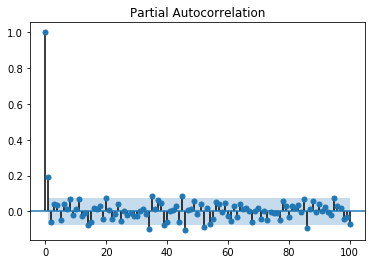

In [97]:
for pair in ['USDT_BTC','USDT_ETH', 'USDT_LTC', 'USDT_DASH', 'BTC_ETH', 'BTC_LTC', 'BTC_DASH']:
    timeSeries = pd.DataFrame()
    df = get_ohlcv_poloniex(pair=pair, start=1483600958, end=9999999999, period=86400)
    df['pct_change'] = df['weightedAverage'].pct_change()
    df['log_ret'] = np.log(df['weightedAverage']) - np.log(df['weightedAverage'].shift(1))
    df[pair] = df['log_ret']
    df = pd.DataFrame(df[pair])
    timeSeries = pd.concat([timeSeries,df], axis=1)
    timeSeries = timeSeries.iloc[1:]
    print(pair)
    clusters(timeSeries, pair)
    plot_partial_lag(timeSeries, 100)